<a href="https://colab.research.google.com/github/vedanthshenoy/Telecom-Churn-and-Customer-Clustering/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('customerdata.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.drop(['customerID','Churn'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [ ]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
cols=data.columns
cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [ ]:
data.dtypes

gender                int32
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [ ]:
enc_data=list(cat_cols)
enc_data=enc_data[:-1]
enc_data

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data[enc_data].head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2


In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
data.shape

(7043, 19)

In [ ]:
data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [ ]:
try:
    data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
except Exception as e:
    print(e)

Unable to parse string " " at position 488


In [ ]:
data['TotalCharges'].empty

False

In [ ]:
data.drop(['TotalCharges'],axis=1,inplace=True)

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
mapping1 = {} 
k=range(1,15)
for i in k:
    kmeanModel = KMeans(n_clusters=i) 
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / data.shape[0])
    mapping1[i] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / data.shape[0]
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 36.68230964496698
2 : 26.302872499051
3 : 19.97599607708306
4 : 16.678150510369857
5 : 14.936353880047387
6 : 13.180081972303395
7 : 11.882603075294453
8 : 11.14959617200976
9 : 10.431959695381922
10 : 9.766337997921134
11 : 9.224321182758548
12 : 8.750920351786474
13 : 8.37040587581724
14 : 8.055109501662399


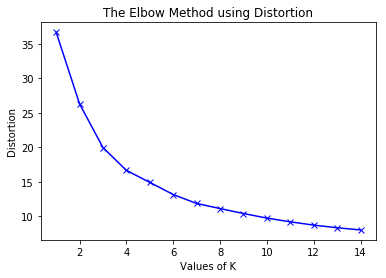

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
mapp={}
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    mapp[k]=km.inertia_
for key,val in mapp.items(): 
    print(str(key)+' : '+str(val)) 

1 : 10687156.450768849
2 : 5554305.64884921
3 : 3360007.848779719
4 : 2210057.5929424637
5 : 1781318.7415155936
6 : 1407651.7686438092
7 : 1165860.677484141
8 : 1026882.2080423448
9 : 904262.7883492351
10 : 792879.8967222441
11 : 699802.3161030769
12 : 625253.7280336549
13 : 579925.8566227327
14 : 536865.2867505519


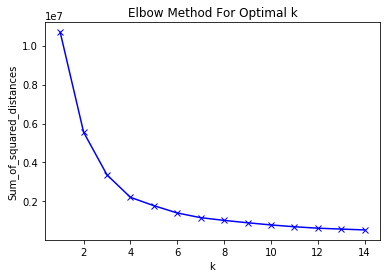

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
try:
    for n_clusters in K:
        clusterer = KMeans (n_clusters=n_clusters).fit(data)
        preds = clusterer.predict(data)
        centers = clusterer.cluster_centers_

        score = silhouette_score (data, preds, metric='euclidean')
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
except Exception as e:
    print(e)

Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [ ]:
score_list=[]
for n_clusters in range(2,15):
        clusterer = KMeans (n_clusters=n_clusters).fit(data)
        preds = clusterer.predict(data)
        centers = clusterer.cluster_centers_

        score = silhouette_score (data, preds, metric='euclidean')
        score_list.append(score)
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4291682412065322)
For n_clusters = 3, silhouette score is 0.44034810630017973)
For n_clusters = 4, silhouette score is 0.46162586820317336)
For n_clusters = 5, silhouette score is 0.4475209878987202)
For n_clusters = 6, silhouette score is 0.42357743890052496)
For n_clusters = 7, silhouette score is 0.4287389990527263)
For n_clusters = 8, silhouette score is 0.4296129311949405)
For n_clusters = 9, silhouette score is 0.4234922926042398)
For n_clusters = 10, silhouette score is 0.41340670351552977)
For n_clusters = 11, silhouette score is 0.4140607691697263)
For n_clusters = 12, silhouette score is 0.42266567454013243)
For n_clusters = 13, silhouette score is 0.41236525617851477)
For n_clusters = 14, silhouette score is 0.41263118004126653)


This indicates 4 to be the best way to cluster.


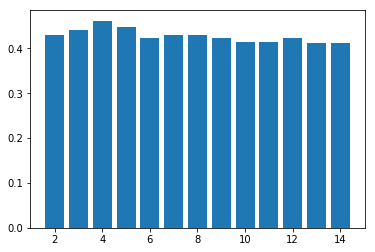

In [ ]:
plt.bar(range(2,15),score_list)
plt.show()

In [ ]:
model=KMeans(n_clusters=4)
model.fit(data)
print(model.labels_)

[0 3 0 ... 0 2 1]
